In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


code to merge validate and train sets

In [ ]:
import pandas as pd


input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
first_dataset_filename = 'train.csv'
second_dataset_filename = 'validate.csv'

data1 = pd.read_csv(input_path + first_dataset_filename)
data2 = pd.read_csv(input_path + second_dataset_filename)

# Concatenate the datasets
combined_data = pd.concat([data1, data2], ignore_index=True)

# Drop duplicates based on the 'id' column
combined_data = combined_data.drop_duplicates(subset='id', keep='first')

output_filename = 'm_trained.csv'
combined_data.to_csv(input_path + output_filename, index=False)

In [ ]:
import pandas as pd

input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
filename = 'threatMerged_train.csv'
data = pd.read_csv(input_path + filename)

# List of classes
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Calculate the minimum class size
min_class_size = data[list_classes].sum().min()

# Create a new DataFrame for the undersampled data
undersampled_data = pd.DataFrame()

for class_name in list_classes:
    # Get a subset of the DataFrame where the class is positive
    class_subset = data[data[class_name] == 1]

    # Sample the subset
    class_subset_undersampled = class_subset.sample(n=min_class_size, random_state=42, replace=False)

    # Append to the undersampled DataFrame
    undersampled_data = pd.concat([undersampled_data, class_subset_undersampled], axis=0)

# Drop duplicates since one sample might belong to multiple classes
undersampled_data = undersampled_data.drop_duplicates()

# Shuffle the dataset to mix up the rows
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

output_filename = 'us_train.csv'
undersampled_data.to_csv(input_path + output_filename, index=False)

In [ ]:
import pandas as pd

input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
filename = 'threatMerged_train.csv'
data = pd.read_csv(input_path + filename)

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
min_class_size = data[list_classes].sum().min()
undersampled_data = pd.DataFrame()

for class_name in list_classes:
    class_subset = data[data[class_name] == 1]
    if len(class_subset) < min_class_size:
        raise ValueError(f"Not enough samples in class {class_name} to undersample to {min_class_size}")
    class_subset_undersampled = class_subset.sample(n=min_class_size, random_state=42, replace=False)
    undersampled_data = pd.concat([undersampled_data, class_subset_undersampled], axis=0)

undersampled_data = undersampled_data.drop_duplicates()
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
output_filename = 'us_train.csv'
undersampled_data.to_csv(input_path + output_filename, index=False)

In [ ]:
import pandas as pd

input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
filename = 'm_trained.csv'
data = pd.read_csv(input_path + filename)

# List of classes
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Calculate the minimum class size
min_class_size = data[list_classes].sum().min()

used_indices = set()  # to keep track of indices that have been used
undersampled_data = pd.DataFrame()

for class_name in list_classes:
    # Get a subset of the DataFrame where the class is positive and not already used
    class_subset = data[(data[class_name] == 1) & (~data.index.isin(used_indices))]

    # Check if available samples are less than required
    if len(class_subset) < min_class_size:
        raise ValueError(f"Not enough samples to undersample for class {class_name}")

    # Sample the subset
    class_subset_undersampled = class_subset.sample(n=min_class_size, random_state=42, replace=False)

    # Store used indices to avoid reusing them
    used_indices.update(class_subset_undersampled.index)

    # Append to the undersampled DataFrame
    undersampled_data = pd.concat([undersampled_data, class_subset_undersampled], axis=0)

# Reset index of the final undersampled DataFrame
undersampled_data = undersampled_data.reset_index(drop=True)


output_filename = 'equally_undersampled_train.csv'
undersampled_data.to_csv(input_path + output_filename, index=False)

ValueError: Not enough samples to undersample for class threat

view it

Training Data Overview:
                 id                                       comment_text  toxic  \
0  51756a58beba4517  Bong Warrior Is a Dickhead Deleting fings wid ...      1   
1  cc510287a999ef9e  FundRasing my Ass. \n\nSetting aside the proty...      1   
2  2e0ac430c023d19d  CKCKCKCK\nYo i see u tryin 2 change shit wit C...      1   
3  cbc3b306b5f9b0d0  fuck you motherfucker.there i said it again bitch      1   
4  e35bf39d4998f727                 Fuck off Dicksternet you dickhead.      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        1       0       1              0  
1             0        1       0       0              0  
2             0        1       1       1              1  
3             1        1       0       1              0  
4             0        1       0       1              0  
             toxic  severe_toxic      obscene       threat       insult  \
count  3511.000000   3511.000000  3511.000000  3511.000000  3511.0

<ipython-input-11-4a5d58a9e08e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


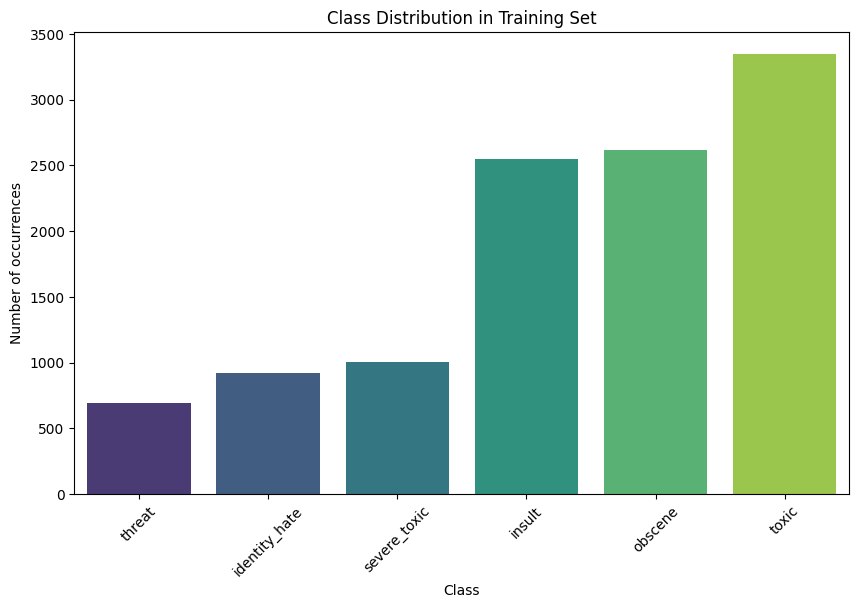


Class Distribution in Validation Set
Total records: 63978
Number of 'threat' records: 211
Number of 'severe_toxic' records: 367
Number of 'identity_hate' records: 712
Number of 'insult' records: 3427
Number of 'obscene' records: 3691
Number of 'toxic' records: 6090


<ipython-input-11-4a5d58a9e08e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


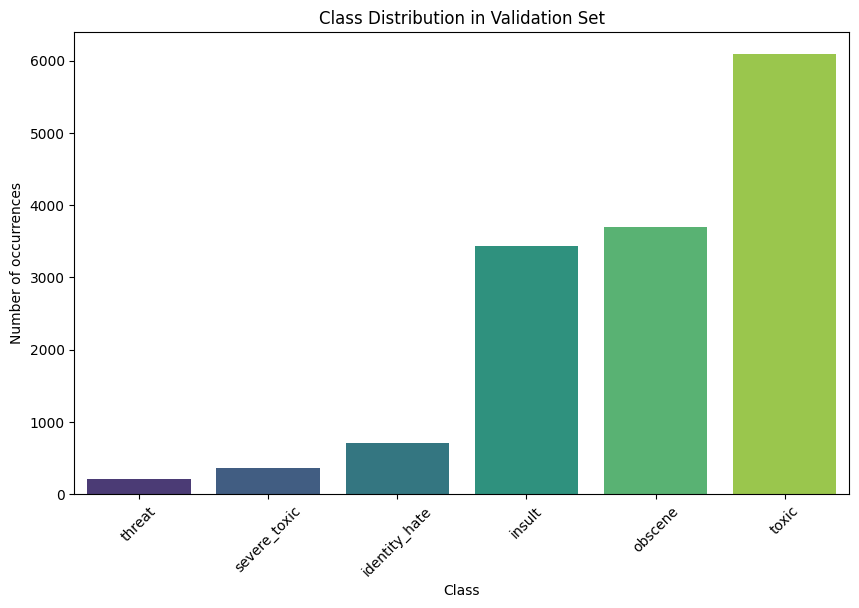

Missing values in training data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Missing values in validation data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


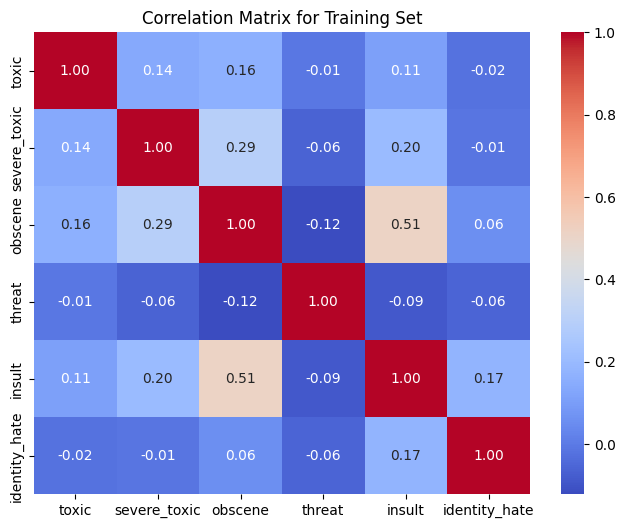

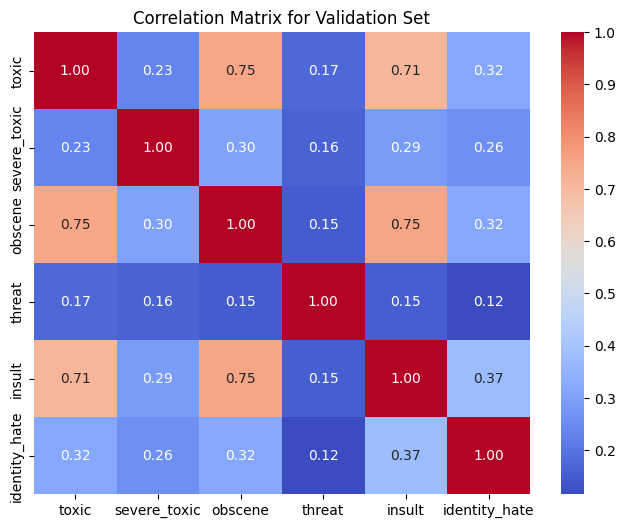

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


input_with_emojis_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
train_df = pd.read_csv(input_with_emojis_path + 'us_train.csv')
validate_df = pd.read_csv(input_with_emojis_path + 'validate.csv')


list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("Training Data Overview:")
print(train_df.head())
print(train_df.describe())

print("\nValidation Data Overview:")
print(validate_df.head())
print(validate_df.describe())


def plot_class_distribution(df, title):
    total_records = len(df)
    class_counts = df[list_classes].sum().sort_values()

    print(f"\n{title}")
    print(f"Total records: {total_records}")
    for class_name, count in class_counts.items():
        print(f"Number of '{class_name}' records: {count}")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title(title)
    plt.ylabel('Number of occurrences')
    plt.xlabel('Class')
    plt.xticks(rotation=45)
    plt.show()

print("Training Data Overview:")
print(train_df.head())
print(train_df.describe())

print("\nValidation Data Overview:")
print(validate_df.head())
print(validate_df.describe())

# Plotting class distribution with updated function
plot_class_distribution(train_df, 'Class Distribution in Training Set')
plot_class_distribution(validate_df, 'Class Distribution in Validation Set')



print("Missing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in validation data:")
print(validate_df.isnull().sum())



def plot_correlation_matrix(df, title):
    correlation_matrix = df[list_classes].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

plot_correlation_matrix(train_df, 'Correlation Matrix for Training Set')
plot_correlation_matrix(validate_df, 'Correlation Matrix for Validation Set')

below a data viwer

Total 'Threat' Records: 211
'Threat' Records not mixed with 'Toxic': 6
Fraction of Only 'Threat' to All 'Threat' Records: 0.03
Total 'Toxic' Records: 6090
'Toxic' Records Mixed with Other Classes: 4380
                     id                                       comment_text  \
0      0001ea8717f6de06  Thank you for understanding. I think very high...   
1      000247e83dcc1211                   :Dear god this site is horrible.   
2      0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
3      0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...   
4      00059ace3e3e9a53  " \n\n == Before adding a new product to the l...   
...                 ...                                                ...   
63973  fff8f64043129fa2  :Jerome, I see you never got around to this…! ...   
63974  fff9d70fe0722906  ==Lucky bastard== \n http://wikimediafoundatio...   
63975  fffa8a11c4378854  ==shame on you all!!!== \n\n You want to speak...   
63976  fffac2a094c

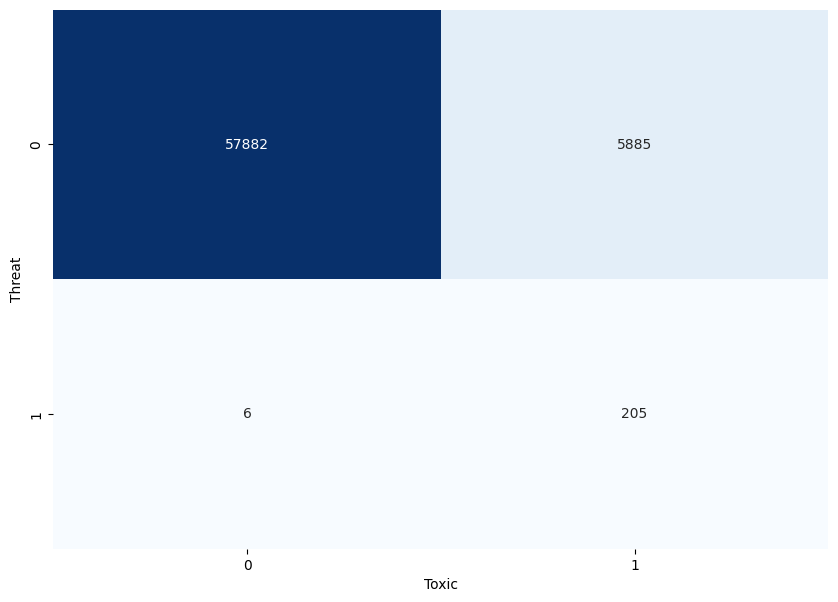

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
filename = 'validate.csv'
data = pd.read_csv(input_path + filename)

# Total 'threat' records
total_threats = data[data['threat'] == 1]

# 'Threat' records not mixed with 'toxic'
only_threat = data[(data['threat'] == 1) & (data['toxic'] == 0)]

# Fraction of only 'threat' to all 'threat' records
fraction_only_threat = len(only_threat) / len(total_threats)

print(f"Total 'Threat' Records: {len(total_threats)}")
print(f"'Threat' Records not mixed with 'Toxic': {len(only_threat)}")
print(f"Fraction of Only 'Threat' to All 'Threat' Records: {fraction_only_threat:.2f}")

# Total 'toxic' records
total_toxic = data[data['toxic'] == 1]

# 'Toxic' records mixed with other classes
toxic_mixed = total_toxic[(total_toxic[list_classes].sum(axis=1) - total_toxic['toxic']) > 0]

print(f"Total 'Toxic' Records: {len(total_toxic)}")
print(f"'Toxic' Records Mixed with Other Classes: {len(toxic_mixed)}")

print(data)


def plot_confusion_matrix_like(data, classes):
    matrix = data[classes].groupby(classes).size().unstack(fill_value=0)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.ylabel('Threat')
    plt.xlabel('Toxic')
    plt.show()

plot_confusion_matrix_like(data, ['threat', 'toxic'])

threat class issue fixing

In [ ]:
import pandas as pd

input_with_emojis_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
train_df = pd.read_csv(input_with_emojis_path + 'train.csv')
validate_df = pd.read_csv(input_with_emojis_path + 'validate.csv')

threat_data_from_validation = validate_df[validate_df['threat'] == 1]


# Concatenate the threat data from validation with the original training data
augmented_train_df = pd.concat([train_df, threat_data_from_validation], ignore_index=True)

# Optional: Drop duplicates based on a unique identifier if available (e.g., 'id')
if 'id' in augmented_train_df.columns:
    augmented_train_df = augmented_train_df.drop_duplicates(subset='id', keep='first')

output_filename = 'threatMerged_train.csv'
augmented_train_df.to_csv(input_with_emojis_path + output_filename, index=False)

In [ ]:
import pandas as pd
import numpy as np

input_with_emojis_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
train_df = pd.read_csv(input_with_emojis_path + 'train.csv')
validate_df = pd.read_csv(input_with_emojis_path + 'validate.csv')

threat_data_from_validation = validate_df[validate_df['threat'] == 1]
augmented_train_df = pd.concat([train_df, threat_data_from_validation], ignore_index=True)

augmented_train_df = augmented_train_df.drop_duplicates(subset='comment_text', keep='first')

# Finding duplicate IDs
duplicate_ids = augmented_train_df[augmented_train_df.duplicated(['id'], keep=False)]

# Filtering out those with the same 'comment_text'
duplicate_ids = duplicate_ids[duplicate_ids.duplicated(['comment_text'], keep=False) == False]

# Outputting duplicates before processing
print("Duplicates with different 'comment_text':")
print(duplicate_ids[['id', 'comment_text']])

# Generating new IDs for duplicates
new_ids = (pd.util.hash_pandas_object(duplicate_ids.index) % 10000000).astype(str)
duplicate_ids['new_id'] = new_ids

# Replace old IDs in the original DataFrame
for index, row in duplicate_ids.iterrows():
    augmented_train_df.loc[index, 'id'] = row['new_id']

# Save the augmented training dataset to a new CSV file
output_filename = 'threatMerged_train.csv'
augmented_train_df.to_csv(input_with_emojis_path + output_filename, index=False)



Duplicates with different 'comment_text':
Empty DataFrame
Columns: [id, comment_text]
Index: []


to fix the class issue. JUST FOR CHECKING WHAT HAPPENS.DONT USE THIS AS SMOTE DONT GENERATE TEXTS AND WE NEED SOME GPT OR SOME LLM TO GENERATE UNDERSAMPLED CLASS TEXTS

In [ ]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

input_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
train_df = pd.read_csv(input_path + 'train.csv')

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(train_df.drop(list_classes, axis=1), train_df[list_classes])

balanced_df = pd.concat([X_train_smote, y_train_smote], axis=1)

balanced_df.to_csv(input_path + 'balanced_train.csv', index=False)

ValueError: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.